In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sympy import symbols, solve
import sympy as sy
from matplotlib import dates

In [78]:
file1='/Users/aliceqichaowu/Downloads/SPY.csv' 
file2='/Users/aliceqichaowu/Downloads/TLT.csv' 
file3='/Users/aliceqichaowu/Downloads/ebola_download.xls'
df1=pd.read_csv(file1)
df2=pd.read_csv(file2)
df3=pd.read_excel(file3)

In [22]:
##Q1
t=0
height=0
while height <8848*10**3:
    t+=1
    height=2**t
print("It would take "+str(t)+" folds to exceed the height of Mount Everest at 8,848m")

It would take 24 folds to exceed the height of Mount Everest at 8,848m


In [23]:
##Q2
t = symbols('t')
time = solve(sy.exp(-0.1*t)-1/2, t)
print('it takes '+str(time)+' for the volume to decrease to less than one half of its initial volume')

it takes [6.93147180559945] for the volume to decrease to less than one half of its initial volume


In [24]:
##Q3
deposit = lambda x:round(100*1.05**x)  # x is the number of years

print('I will earn $ '+ str(deposit(1)),str(deposit(2)) ,str(deposit(3)), str(deposit(4)), str(deposit(5)))

I will earn $ 105 110 116 122 128


In [25]:
##Q4
# loan = lambda x:round((20000*(1+0.01/12)**(12*x))/(12*x)) # x is the number of years
loan = lambda x:round(0.01*20000/(1-(1+0.01)**(-x*12)))
print('I will pay $ '+ str(loan(1)),str(loan(2)) ,str(loan(3)))

I will pay $ 1777 941 664


it will take 70 days to repay your initial investment based on cumulated profits


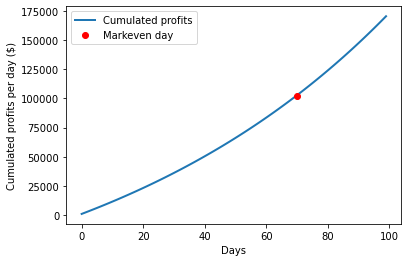

In [27]:
##Q5
x = np.arange(0,100)
profits = np.cumsum((100*1.01**x)*10 )# t is the number of days
t=0
cumsum=0
while cumsum <100000:
    t+=1
    cumsum+=(100*1.01**t)*10
print ('it will take '+ str(t)+ " days to repay your initial investment based on cumulated profits")

fig, ax = plt.subplots()
ax.plot(x,profits, linewidth=2.0)
ax.plot(t,cumsum,'ro')
plt.xlabel('Days')
plt.ylabel('Cumulated profits per day ($)')
plt.legend (['Cumulated profits','Markeven day'])
plt.show()

In [79]:
# Q6
new_date=pd.date_range(start=df3.iat[0,0], end=df3.iat[-1,0])

df3=df3.iloc[:,0:3]
df3=df3.set_index('Date')
df3=df3.reindex(new_date)
df3=df3.interpolate()
df3.head(10)

,Cases,Death
2014-03-22,49.0,29.0
2014-03-23,67.5,44.0
2014-03-24,86.0,59.0
2014-03-25,86.0,60.0
2014-03-26,86.0,62.0
2014-03-27,111.0,72.0
2014-03-28,120.0,76.0
2014-03-29,114.0,71.0
2014-03-30,122.0,76.5
2014-03-31,130.0,82.0


2014-03-27 00:00:00 111.0
2014-06-13 00:00:00 502.8
2014-07-15 00:00:00 1004.0
2014-08-12 00:00:00 2051.0
2014-09-12 00:00:00 5092.5
the number of cases due to Ebola exceeded 100 are 2014-03-27 00:00:00
            ~ deaths are 2014-04-06 00:00:00
the number of cases due to Ebola exceeded 500 are 2014-06-13 00:00:00
            ~ deaths are 2014-07-05 00:00:00
the number of cases due to Ebola exceeded 1000 are 2014-07-15 00:00:00
            ~ deaths are 2014-08-09 00:00:00
the number of cases due to Ebola exceeded 2000 are 2014-08-12 00:00:00
            ~ deaths are 2014-09-03 00:00:00
the number of cases due to Ebola exceeded 5000 are 2014-09-12 00:00:00
            ~ deaths are 2014-10-24 00:00:00


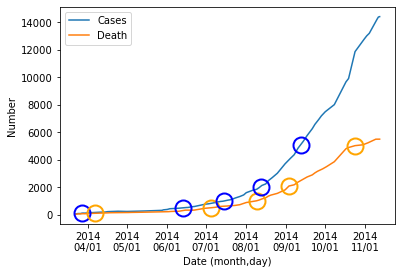

In [80]:
list_dates=[100,500,1000,2000,5000]
pts_cases=[]
pts_death=[]
for i in range(len(list_dates)):
    cases_tbl=df3.loc[(df3['Cases'] >list_dates[i])]
    cases_Eb=cases_tbl.iat[0,0]
    cases_dates=cases_tbl.index[0]
    print(cases_dates,cases_Eb)
    death_tbl=df3.loc[(df3['Death'] >list_dates[i])]
    death_Eb=death_tbl.iat[0,1]
    death_dates=death_tbl.index[0]
#     print (cases_dates,death_dates)
    pts_cases.append([cases_dates,cases_Eb])
    pts_death.append([death_dates,death_Eb])

ax = plt.gca()
xaxis = dates.date2num(df3.index)    # Convert to maplotlib format

hfmt = dates.DateFormatter('%Y\n%m/%d')
ax.xaxis.set_major_formatter(hfmt)
ax.plot(df3.index,df3['Cases'])
ax.plot(df3.index,df3['Death'])

plt.ylabel('Number')
plt.xlabel('Date (month,day)')
ax.legend(['Cases', 'Death'])


for i in range(len(list_dates)):
    circle_rad = 8  # This is the radius, in points
    ax.plot(pts_cases[i][0], pts_cases[i][1], 'o',
            ms=circle_rad * 2, mec='b', mfc='none', mew=2)
    ax.plot(pts_death[i][0], pts_death[i][1], 'o',
            ms=circle_rad * 2, mec='orange', mfc='none', mew=2)
    print('the number of cases due to Ebola exceeded '+ str(list_dates[i])+' are '+ str(pts_cases[i][0]))
    print('            ~ deaths are '+ str(pts_death[i][0]))

In [81]:
## Q7
GR_death=df3['Death'].diff(1)
GR_cases=df3['Cases'].diff(1)
Avg_GR_death=GR_death.mean(axis='index')
Avg_GR_cases=GR_cases.mean(axis='index')
print ('The average growth rate of Ebola cases is '+ str(round(Avg_GR_cases*100))+"%"+", and death is "+ str(round(Avg_GR_death*100))+"%")

The average growth rate of Ebola cases is 6112%, and death is 2327%


The average ratio of Ebola deaths to cases is 0.5577992908998354


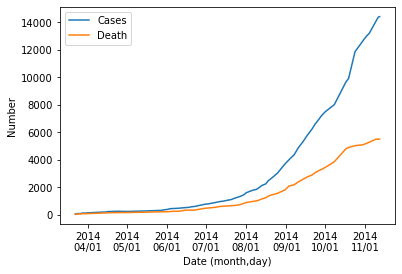

In [84]:
## Q8
ax = plt.gca()
xaxis = dates.date2num(df3.index)    # Convert to maplotlib format
hfmt = dates.DateFormatter('%Y\n%m/%d')
ax.xaxis.set_major_formatter(hfmt)

ax.plot(df3.index,df3['Cases'])
ax.plot(df3.index,df3['Death'])

plt.ylabel('Number')
plt.xlabel('Date (month,day)')
ax.legend(['Cases', 'Death'])

ratio=(df3['Death']/df3['Cases']).mean(axis='index')
print('The average ratio of Ebola deaths to cases is '+ str(ratio))

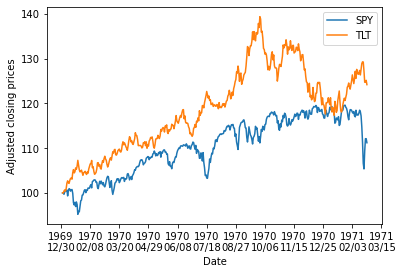

In [85]:
## Q9
select_date_spy = df1[(df1['Date'] >= '2014-01-01') & (df1['Date'] <= '2015-08-31')]
adj_closing_spy = select_date_spy['Adj Close']
adj_closing_spy = adj_closing_spy.div(adj_closing_spy.iloc[0])*100

select_date_tlt = df2[(df2['Date'] >= '2014-01-01') & (df2['Date'] <= '2015-08-31')]
adj_closing_tlt = select_date_tlt['Adj Close']
adj_closing_tlt = adj_closing_tlt.div(adj_closing_tlt.iloc[0])*100

ax = plt.gca()
xaxis = dates.date2num(select_date_tlt['Date']) 
hfmt = dates.DateFormatter('%Y\n%m/%d')
ax.xaxis.set_major_locator(dates.DayLocator(interval=40))
ax.xaxis.set_major_formatter(hfmt)

plt.plot(select_date_spy['Date'],adj_closing_spy)
plt.plot(select_date_tlt['Date'],adj_closing_tlt)

plt.ylabel('Adjusted closing prices')
plt.xlabel('Date')
ax.legend(['SPY', 'TLT'])


In [86]:
## Q10
i=0
daily_return_tlt=[]
daily_return_spy=[]
# for i in range(0,len(select_date_spy['Date'])-1):
while i<len(select_date_spy['Date'])-1:
    prev=adj_closing_tlt.iloc[i] 
    prev2=adj_closing_spy.iloc[i] 
    i+=1
    curr=adj_closing_tlt.iloc[i]  
    curr2=adj_closing_spy.iloc[i]  
#     print(prev,curr)
    daily_return_tlt.append((curr/prev-1)*100)
    daily_return_spy.append((curr2/prev2-1)*100)

print('The average daily return of SPY is '+ str(sum(daily_return_spy)/len(daily_return_spy))+
      '%, min is '+str(min(daily_return_spy))+'%, and max is '+str(max(daily_return_spy))+'%')
print('The average daily return of TLT is '+ str(sum(daily_return_tlt)/len(daily_return_tlt))+
      '%, min is '+str(min(daily_return_tlt))+'%, and max is '+str(max(daily_return_tlt))+'%')

The average daily return of SPY is 0.02861222418255792%, min is -4.2106971626892475%, and max is 3.8394124544050445%
The average daily return of TLT is 0.05537842887416512%, min is -2.4324931167024166%, and max is 2.6468904269034477%
